### Geographical Visualisations with Phyton
### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Data wrangling & cleaning
#### 3. Plotting a choropleth

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
#loading garbage collector
import gc

In [5]:
# Import "geo.json" file for neighbourhoods Amsterdam 
neighbourhood_geo = r'/Users/katja/Documents/Airbnb/02 Data/Original Data/neighbourhoods.geojson'

In [6]:
# preview geojson file

f = open(r'/Users/katja/Documents/Airbnb/02 Data/Original Data/neighbourhoods.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[4.991669, 52.324436, 0], [4.991755, 52.324289, 0], [4.991828, 52.324175, 0], [4.991894, 52.324077, 0], [4.991952, 52.323996, 0], [4.992036, 52.32387, 0], [4.992109, 52.323767, 0], [4.99217, 52.323706, 0], [4.992597, 52.323135, 0], [4.993457, 52.32195, 0], [4.994212, 52.321029, 0], [4.99435, 52.320829, 0], [4.994392, 52.320774, 0], [4.994406, 52.32076, 0], [4.994621, 52.320511, 0], [4.994821, 52.320267, 0], [4.994833, 52.320241, 0], [4.994884, 52.320184, 0], [4.995243, 52.319674, 0], [4.99541, 52.319446, 0], [4.995604, 52.31921, 0], [4.995819, 52.318968, 0], [4.996035, 52.318706, 0], [4.99612, 52.318579, 0], [4.996189, 52.318501, 0], [4.996431, 52.318201, 0], [4.996455, 52.318169, 0], [4.996719, 52.317849, 0], [4.996734, 52.317824, 0], [4.996914, 52.317652, 0], [4.996334, 52.317348, 0], [4.995533, 52.316932, 0], [4.995051, 52.31669, 0], [4.994432, 52.316389, 0], [4.994223, 52.316289, 0], [4.993805, 52.316093, 0]

In [7]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Airbnb/02 Data')

In [67]:
#import Airbnb Amsterdam csv
df = pd.read_csv(os.path.join(path, 'Prepared Data','2023_Amsterdam_Airbnb_Data.csv'), index_col = False)

## 2. Data checking, cleaning and wrangling 

In [37]:
pd.set_option('display.max_columns', None)
df.head()
# Displays all columns for visualization purposes

,listing_id,host_id,host_listings_count,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood,latitude,longitude,property_type,room_type,property_accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_location,review_scores_communication,Airbnb Availability,airbnb availability,price category,neigbourhood,average_price
0,2818,3159,1,2008/09/24,within an hour,100,Superhost,Host Profile Pic,Oostelijk Havengebied Indische Buurt,52.36435,4.94358,Private room in condo,Private room,2,69.0,3,28,0,365,2.04,51,2009/03/30,2023/11/27,4.90,4.71,4.98,No Availability,No Availability,low price,Oostelijk Havengebied Indische Buurt,197
1,20168,59484,2,2009/12/02,within an hour,100,Not a Superhost,Host Profile Pic,CentrumOost,52.36407,4.89393,Private room in townhouse,Private room,2,117.0,1,365,168,366,2.18,30,2010/03/02,2023/12/10,4.44,4.88,4.61,No Availability,No Availability,middle price,CentrumOost,224
2,27886,97647,1,2010/03/23,within an hour,100,Superhost,Host Profile Pic,CentrumWest,52.38761,4.89188,Private room in houseboat,Private room,2,155.0,3,356,175,267,1.84,24,2012/01/09,2023/11/19,4.93,4.89,4.92,No Availability,No Availability,middle price,CentrumWest,226
3,28871,124245,2,2010/05/13,within an hour,100,Superhost,Host Profile Pic,CentrumWest,52.36775,4.89092,Private room in rental unit,Private room,2,79.0,2,730,0,569,3.51,116,2010/08/22,2023/12/10,4.87,4.94,4.93,No Availability,No Availability,low price,CentrumWest,226
4,29051,124245,2,2010/05/13,within an hour,100,Superhost,Host Profile Pic,CentrumOost,52.36584,4.89111,Private room in rental unit,Private room,2,59.0,2,730,91,698,4.50,97,2011/03/16,2023/12/08,4.81,4.88,4.92,No Availability,No Availability,low price,CentrumOost,224


In [71]:
# ctreating an average price column for the map 
df['average_price'] = df.groupby('neighbourhood')['price'].transform('mean')

In [84]:
# update  from int to str
df ['average_price'] = df ['average_price'].astype('int', errors = 'ignore')

In [19]:
df.shape

(4847, 31)

In [20]:
# check for missing values
df.isnull().sum()

listing_id                     0
host_id                        0
host_listings_count            0
host_since                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_has_profile_pic           0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
property_accommodates          0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
reviews_per_month              0
number_of_reviews_ltm          0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_location         0
review_scores_communication    0
Airbnb Availability            0
airbnb availability            0
price category                 0
neigbourhood                   0
average_pr

In [26]:
# checking for duplicates
df_dups = df[df.duplicated()]

In [27]:
df_dups

,listing_id,host_id,host_listings_count,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood,latitude,longitude,property_type,room_type,property_accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_location,review_scores_communication,Airbnb Availability,airbnb availability,price category,neigbourhood,average_price


In [87]:
columns = ['price',
            'average_price', 
            'neighbourhood', 
            'review_scores_rating']

In [88]:
neighbourhood_rev = df[columns]

In [89]:
neighbourhood_rev.head()

,price,average_price,neighbourhood,review_scores_rating
0,69.0,206,Oostelijk Havengebied - Indische Buurt,4.90
1,117.0,273,Centrum-Oost,4.44
2,155.0,280,Centrum-West,4.93
3,79.0,280,Centrum-West,4.87
4,59.0,273,Centrum-Oost,4.81


In [79]:
neighbourhood_rev.isnull().sum()

price                   0
average_price           0
neighbourhood           0
review_scores_rating    0
dtype: int64

### Checking for extreme value for variable - Price

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

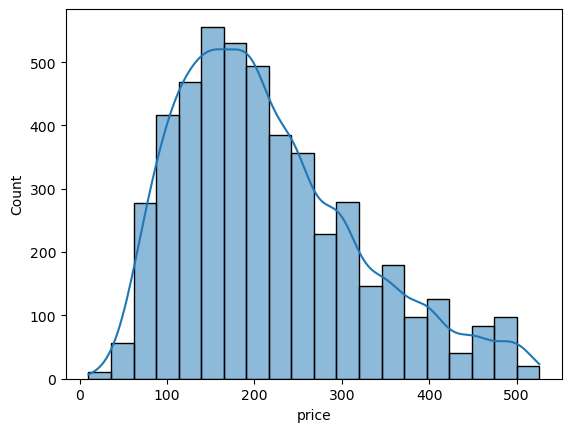

In [28]:
sns.histplot(df['price'], bins=20, kde = True)
#  Price ranges do not have extreme values. 

#  My hypothesis is that location determines price of the listed properties.
# Hypothesis: The neighborhood in which an Airbnb property is located significantly 
#  influences its average price meaning a more popular neighbourhood with higher listing has a higher average price.


### Checking for extreme value for variable - Average Price

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_price', ylabel='Count'>

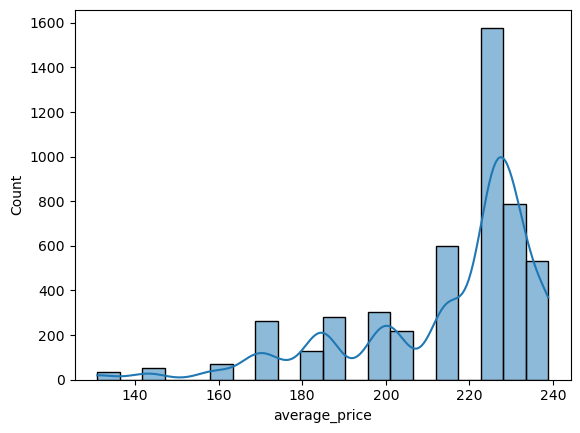

In [30]:
sns.histplot(df['average_price'], bins=20, kde = True)
# shows no extreme value

### Checking for extreme value for variable - number of reviews

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_reviews', ylabel='Count'>

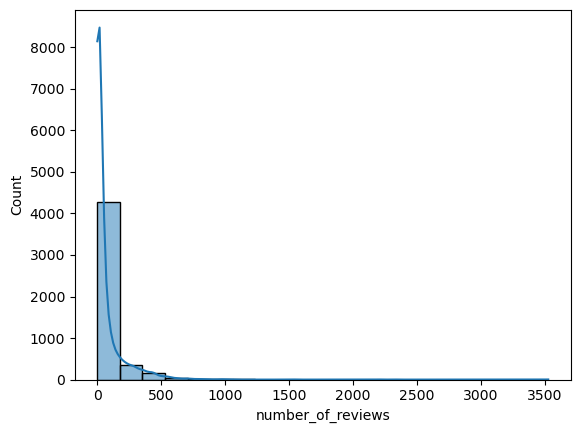

In [31]:
sns.histplot(df['number_of_reviews'], bins=20, kde = True)
#  Number of reviews range from 0 to 500 - this is not uncommon as Airbnb hosts can have a history of 
#  renting our their property for several years as we seen from the dates of the first review previously. 
#  On other side, Airbnb hosts might not have reviews yet if they signed up recently.

### Checking for extreme value for variable - review scores rating

/Users/katja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_rating', ylabel='Count'>

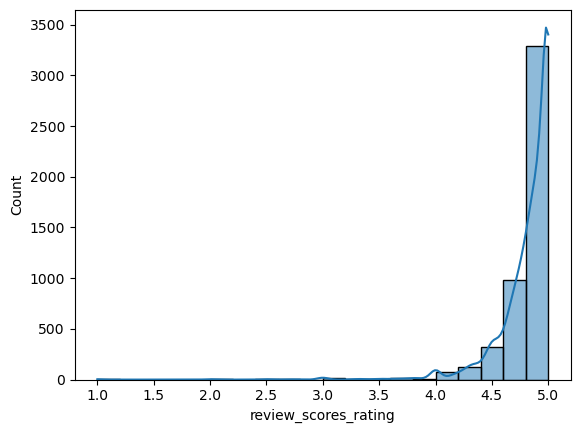

In [34]:
sns.histplot(df['review_scores_rating'], bins=20, kde = True)
#  The chart below indicates there is no outlier of score ratings. 

## 3. Plotting a chloropleth map

In [95]:
data_to_plot = neighbourhood_rev [['neighbourhood', 'review_scores_rating']]
data_to_plot.head()

,neighbourhood,review_scores_rating
0,Oostelijk Havengebied - Indische Buurt,4.90
1,Centrum-Oost,4.44
2,Centrum-West,4.93
3,Centrum-West,4.87
4,Centrum-Oost,4.81


In [98]:
map_review_score = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = neighbourhood_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'review_scores_rating'],
    key_on = 'feature.properties.neighbourhood', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "review score").add_to(map_review_score)
folium.LayerControl().add_to(map_review_score)

In [99]:
map_review_score

In [100]:
# export map review score neighbourhood
map_review_score.save('map_review_score_data.html')

In [101]:
data_to_plot_2 = neighbourhood_rev[['neighbourhood','average_price']]
data_to_plot_2.head()

,neighbourhood,average_price
0,Oostelijk Havengebied - Indische Buurt,206
1,Centrum-Oost,273
2,Centrum-West,280
3,Centrum-West,280
4,Centrum-Oost,273


In [102]:
map_average_price_neighbourhood = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = neighbourhood_geo, 
    data = data_to_plot_2,
    columns = ['neighbourhood','average_price'],
    key_on = 'feature.properties.neighbourhood', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "average price").add_to(map_average_price_neighbourhood)
folium.LayerControl().add_to(map_average_price_neighbourhood)

In [103]:
map_average_price_neighbourhood

In [104]:
# export html link map map_average_price_neighbourhood
map_average_price_neighbourhood.save('map_average_price_neighbourhood.html')

#### Does the analysis answer any of your existing research questions?
#### Does the analysis lead you to any new research questions?

The analysis confirms my assumption and hypothesis from the previous task. 

First I choose to have a look at the overall review score rating and average price vs the neighbourhoods. To no surprise got the majority of neighbourhood a rating of five as the most reviews are within 4.8 and 5. Accommodants give seldom lower ratings. (map review score)

Secoundly I wanted to follow up my hypothesis. 

Hypothesis: The neighborhood in which an Airbnb property is located significantly influences its average price meaning a more popular neighbourhood with higher listing has a higher average price.

I choose to have a look at the average price vs the neighbourhoods. The map seems to prove that location influences the prices as the center of Amsterdam has the highest prices and towards the suburbs the average price for an Airbnb property decreases. 

As mentioned before, I would like to follow up in conducting a more detailed analysis of the various review scores such as location and communication, first and last review. 

In [105]:
#delete df to save space 

del map_average_price_neighbourhood
del data_to_plot_2
del map_review_score
del data_to_plot
del neighbourhood_rev
del columns
del df_dups
del df 

gc.collect()

1746